In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects

from scipy import stats

In [2]:
def get_t_score_from_p_value(p_val_ref,df):
    t_score = 1
    p_val = 2*(1 - stats.t.cdf(t_score,df=df))
    err = 0.0000001
    factor = 10

    while abs(p_val - p_val_ref) > err:
        t_score = t_score + (p_val - p_val_ref)*factor
        p_val = 2*(1 - stats.t.cdf(t_score,df=df))
        
    return t_score

# MQ2008

In [3]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [4]:
dataset_path = "../../MQ2008/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

### NDCG measures for the top models of RankLib implementation

In [5]:
ranklib_path = "../../MQ2008/results_summary/Results_RankLib_global_vali.csv"
ranklib_df = pd.read_csv(ranklib_path)

ranklib_df = ranklib_df.sort_values(['NDCG_Mean'],ascending=False)
ranklib_top_model_id = ranklib_df.index[0]

In [6]:
#TOP 5 MODELS OF OUR PERSONAL LISTNET IMPLEMENTATION
ranklib_df.head(5)

,epochs,learning_rate,Opti_method,P@1,P@2,P@3,P@4,P@5,P@6,P@7,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
15,1000,0.00001,NDCG@5,0.41752,0.39138,0.36706,0.35022,0.33266,0.31378,0.29300,...,0.40856,0.43220,0.45352,0.47004,0.47670,0.44342,0.21112,0.21592,0.385060,0.008635
21,1500,0.00100,NDCG@10,0.41496,0.38798,0.36564,0.34608,0.33120,0.31198,0.29214,...,0.40744,0.42988,0.45152,0.46752,0.47510,0.44168,0.21086,0.21542,0.383548,0.008511
28,1500,0.00001,P@10,0.41326,0.38902,0.36366,0.34950,0.33342,0.31340,0.29196,...,0.40490,0.43024,0.45228,0.46796,0.47476,0.44172,0.21212,0.21614,0.383384,0.008456
37,2000,0.00001,P@5,0.41494,0.38730,0.36492,0.35128,0.33410,0.31436,0.29210,...,0.40584,0.43172,0.45356,0.46782,0.47428,0.44070,0.20956,0.21410,0.383244,0.008618
29,1500,0.00001,ERR@10,0.41070,0.38904,0.36506,0.35010,0.33146,0.31292,0.29232,...,0.40700,0.43150,0.45222,0.46746,0.47524,0.44196,0.21008,0.21522,0.383020,0.008613


In [7]:
ranklib_df.iloc[0]["P_Mean"]

0.324048

In [8]:
columns = ["Fold" if x == 0 else ranklib_df.columns[x-1] for x in range(len(ranklib_df.columns)+1)]
best_df = pd.DataFrame(columns = columns)
index = 0
for fold in ["fold1","fold2","fold3","fold4","fold5","global"]:
    my_path = "../../MQ2008/results_summary/Results_RankLib_"+fold+"_test.csv"
    temp_df = pd.read_csv(my_path)
    best_df.loc[index,0:1] = fold
    best_df.loc[index,1:] = (temp_df.loc[ranklib_top_model_id])
    index += 1

In [9]:
best_df

,Fold,epochs,learning_rate,Opti_method,P@1,P@2,P@3,P@4,P@5,P@6,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,fold1,1000,1e-05,NDCG@5,0.391,0.3686,0.3611,0.3606,0.3436,0.3109,...,0.3843,0.4168,0.4408,0.4514,0.4604,0.4078,0.199,0.204,0.36151,0.00841872
1,fold2,1000,1e-05,NDCG@5,0.4013,0.3408,0.31,0.3041,0.2904,0.2781,...,0.3522,0.3774,0.3952,0.4134,0.4167,0.4015,0.1449,0.1488,0.33364,0.00939864
2,fold3,1000,1e-05,NDCG@5,0.414,0.3758,0.3376,0.3248,0.307,0.3015,...,0.3914,0.4183,0.4355,0.4608,0.4627,0.4459,0.2362,0.2454,0.38456,0.00610522
3,fold4,1000,1e-05,NDCG@5,0.4713,0.4459,0.4374,0.4108,0.3847,0.3705,...,0.4613,0.4899,0.5034,0.5191,0.5253,0.4744,0.2782,0.2841,0.43425,0.00746566
4,fold5,1000,1e-05,NDCG@5,0.4204,0.3885,0.3609,0.3471,0.3376,0.3153,...,0.4116,0.4384,0.476,0.4895,0.4954,0.4645,0.1969,0.2021,0.39228,0.011016
5,global,1000,1e-05,NDCG@5,0.4196,0.38392,0.3614,0.34948,0.33266,0.31526,...,0.40016,0.42816,0.45018,0.46684,0.4721,0.43882,0.21104,0.21688,0.381248,0.00828659


### NDCG measures for the ListNet baselines of MQ2008

In [10]:
baseline_path = "../../MQ2008/results_summary/Results_baseline_vali.csv"
baseline_df = pd.read_csv(baseline_path)

In [11]:
baseline_df

,Folds,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,Fold1,0.4968,0.4618,0.4098,0.3806,0.3478,0.3206,0.2985,0.2779,0.2604,...,0.4831,0.5093,0.5228,0.5363,0.5465,0.5073,0.2153,0.2222,0.44313,0.013811
1,Fold2,0.4423,0.4071,0.4038,0.3830,0.3538,0.3152,0.2921,0.2740,0.2557,...,0.4315,0.4544,0.4683,0.4753,0.4892,0.4371,0.2173,0.2195,0.39549,0.009019
2,Fold3,0.4140,0.3471,0.3439,0.3264,0.3096,0.2930,0.2712,0.2532,0.2350,...,0.3766,0.4001,0.4191,0.4337,0.4364,0.4229,0.1597,0.1630,0.34765,0.009952
3,Fold4,0.4204,0.4013,0.3439,0.3328,0.3159,0.2983,0.2803,0.2643,0.2456,...,0.4101,0.4389,0.4557,0.4693,0.4753,0.4603,0.2496,0.2553,0.39995,0.006292
4,Fold5,0.5223,0.5127,0.4671,0.4347,0.3987,0.3800,0.3558,0.3336,0.3142,...,0.4997,0.5254,0.5353,0.5462,0.5498,0.5027,0.2930,0.2969,0.46805,0.008488
5,average,0.4592,0.4260,0.3937,0.3715,0.3452,0.3214,0.2996,0.2806,0.2622,...,0.4402,0.4656,0.4802,0.4922,0.4994,0.4661,0.2270,0.2314,0.41086,0.009283


In [12]:
baseline_df.iloc[5]["P_Mean"]

0.34062

### Comparison NDCG measures between top model of Ranklib and the baseline

In [13]:
ranklib_mean = [[] for x in range(len(datasets))]
ranklib_var = [[] for x in range(len(datasets))]

baseline_mean = [[] for x in range(len(datasets))]
baseline_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    ranklib_list_NDCG = [[] for x in range(len(measures_names))]
    baseline_list_NDCG = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2008/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        ranklib_path = "../../MQ2008/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ranklib_df = pd.read_csv(ranklib_path)
        
        for idx_metric in range(len(measures_names)):
            ranklib_list_NDCG[idx_metric].append(ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]])
            baseline_list_NDCG[idx_metric].append(baseline_df.iloc[idx_fold][measures_names[idx_metric]])
            
    ranklib_mean[idx_dataset] = np.array(ranklib_list_NDCG).mean(axis=1)
    ranklib_var[idx_dataset] = np.array(ranklib_list_NDCG).var(axis=1)
    
    baseline_mean[idx_dataset] = np.array(baseline_list_NDCG).mean(axis=1)
    baseline_var[idx_dataset] = np.array(baseline_list_NDCG).var(axis=1)

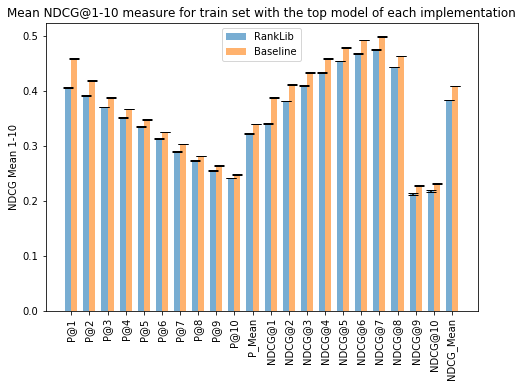

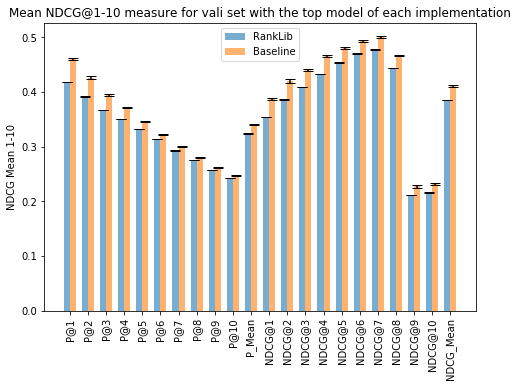

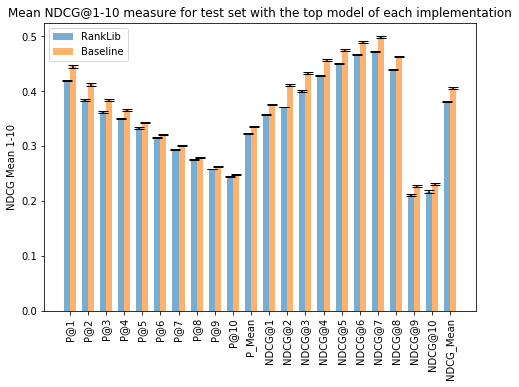

In [14]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, ranklib_mean[idx_dataset],width, yerr = ranklib_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "RankLib")
    ax.bar(indices+width/2, baseline_mean[idx_dataset],width, yerr = baseline_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "Baseline")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [15]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [16]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2008/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        ranklib_path = "../../MQ2008/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ranklib_df = pd.read_csv(ranklib_path)
        
        for idx_metric in range(len(measures_names)):
            ranklib_NDCG = ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]]
            baseline_NDCG = baseline_df.iloc[idx_fold][measures_names[idx_metric]]
            diff[idx_metric].append(ranklib_NDCG - baseline_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


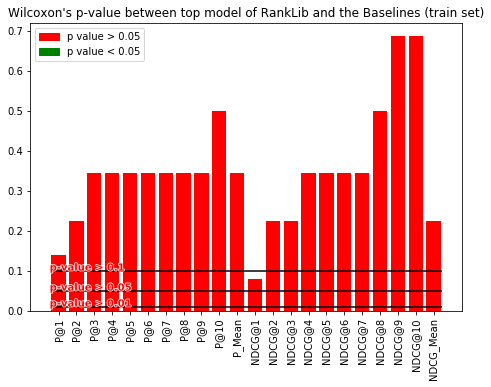

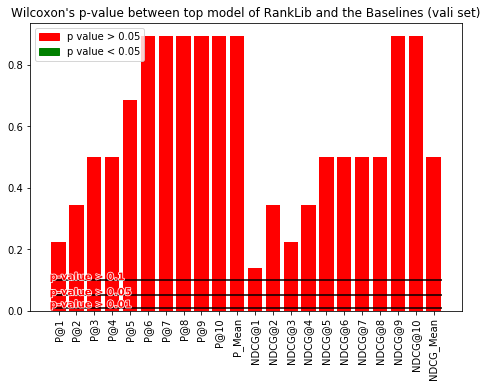

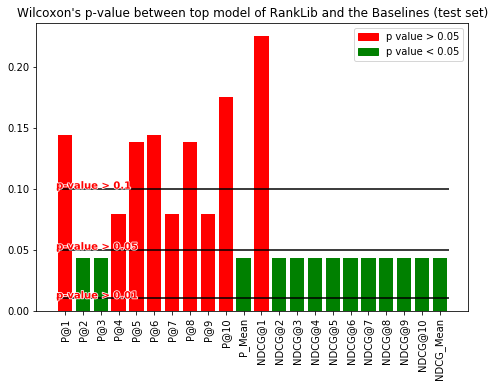

In [17]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of RankLib and the Baselines ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [18]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,2,3,4,4,4,4,4,4,4,5,4,1,3,3,4,4,4,4,5,6,6,3
vali,3,4,5,5,6,7,7,7,7,7,7,2,4,3,4,5,5,5,5,7,7,5
test,1,0,0,1,2,1,1,2,1,2.5,0,3,0,0,0,0,0,0,0,0,0,0


In [19]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0.138011,0.224916,0.345231,0.345231,0.345231,0.345231,0.345231,0.345231,0.345231,0.500184,0.345231,0.0796158,0.224916,0.224916,0.345231,0.345231,0.345231,0.345231,0.500184,0.68583,0.68583,0.224916
vali,0.224916,0.345231,0.500184,0.500184,0.68583,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.138011,0.345231,0.224916,0.345231,0.500184,0.500184,0.500184,0.500184,0.892738,0.892738,0.500184
test,0.144127,0.0431144,0.0431144,0.0796158,0.138011,0.144127,0.0796158,0.138011,0.0796158,0.175554,0.0431144,0.224916,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144


# MQ2007

In [20]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [21]:
dataset_path = "../../MQ2007/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

### NDCG measures for the top models of RankLib's ListNet implementation

In [35]:
ranklib_path = "../../MQ2007/results_summary/Results_RankLib_global_vali.csv"
ranklib_df = pd.read_csv(ranklib_path)

ranklib_df = ranklib_df.sort_values(['NDCG_Mean'],ascending=False)
ranklib_top_model_id = ranklib_df.index[0]

In [36]:
#TOP 5 MODELS OF OUR PERSONAL LISTNET IMPLEMENTATION
ranklib_df.head(5)

,epochs,learning_rate,Opti method,P@1,P@2,P@3,P@4,P@5,P@6,P@7,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
23,1500,0.001,P@10,0.45134,0.43124,0.41496,0.40120,0.39234,0.38526,0.37660,...,0.39238,0.39460,0.39812,0.40378,0.40772,0.41318,0.41816,0.42424,0.402896,0.000145
31,2000,0.001,NDCG@10,0.45312,0.43146,0.41434,0.40190,0.39294,0.38588,0.37826,...,0.39078,0.39406,0.39794,0.40318,0.40762,0.41292,0.41848,0.42364,0.402724,0.000141
1,500,0.001,NDCG@10,0.44684,0.43352,0.41478,0.40294,0.39244,0.38544,0.37680,...,0.39194,0.39518,0.39798,0.40342,0.40720,0.41236,0.41786,0.42304,0.402362,0.000146
3,500,0.001,P@10,0.44858,0.42986,0.41562,0.40236,0.39314,0.38722,0.37918,...,0.39148,0.39386,0.39748,0.40390,0.40822,0.41304,0.41878,0.42406,0.402356,0.000162
22,1500,0.001,P@5,0.44862,0.43106,0.41634,0.40274,0.39256,0.38542,0.37778,...,0.39202,0.39468,0.39746,0.40340,0.40754,0.41294,0.41792,0.42348,0.402334,0.000151


In [37]:
ranklib_df.iloc[0]["P_Mean"]

0.394984

In [39]:
ranklib_path = "../../MQ2007/results_summary/Results_RankLib_global_test.csv"
ranklib_df = pd.read_csv(ranklib_path)
ranklib_df.iloc[ranklib_top_model_id]

epochs                  1500
learning_rate          0.001
Opti method             P@10
P@1                  0.45154
P@2                  0.43204
P@3                   0.4159
P@4                  0.40206
P@5                  0.39272
P@6                    0.385
P@7                  0.37846
P@8                  0.37192
P@9                  0.36542
P@10                 0.36116
P_Mean              0.395622
P_Var             0.00079831
NDCG@1               0.38734
NDCG@2                0.3898
NDCG@3               0.39252
NDCG@4               0.39548
NDCG@5               0.39892
NDCG@6               0.40486
NDCG@7               0.40974
NDCG@8               0.41422
NDCG@9               0.41916
NDCG@10              0.42488
NDCG_Mean           0.403692
NDCG_Var         0.000151237
Name: 23, dtype: object

### NDCG measures for the ListNet baselines of MQ2008

In [40]:
baseline_path = "../../MQ2007/results_summary/Results_baseline_test.csv"
baseline_df = pd.read_csv(baseline_path)

In [41]:
baseline_df

,Folds,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,Fold1,0.4792,0.4702,0.4514,0.4546,0.4381,0.4286,0.4230,0.4170,0.4094,...,0.4389,0.4516,0.4542,0.4587,0.4658,0.4695,0.4738,0.4767,0.45578,0.000244
1,Fold2,0.4749,0.4469,0.4277,0.4248,0.4059,0.4027,0.3974,0.3960,0.3900,...,0.3910,0.3979,0.3965,0.4057,0.4113,0.4185,0.4231,0.4270,0.40748,0.000135
2,Fold3,0.4690,0.4558,0.4395,0.4189,0.4106,0.3982,0.3869,0.3813,0.3707,...,0.4271,0.4247,0.4305,0.4358,0.4347,0.4400,0.4428,0.4478,0.43197,0.000095
3,Fold4,0.4307,0.4336,0.4159,0.4019,0.3965,0.3874,0.3772,0.3687,0.3658,...,0.3798,0.3823,0.3906,0.3969,0.4003,0.4043,0.4118,0.4214,0.39177,0.000353
4,Fold5,0.4661,0.4292,0.4326,0.4240,0.4118,0.4012,0.3995,0.3923,0.3874,...,0.4085,0.4154,0.4131,0.4173,0.4254,0.4315,0.4388,0.4472,0.41904,0.000263
5,average,0.4640,0.4471,0.4334,0.4248,0.4126,0.4036,0.3968,0.3911,0.3847,...,0.4091,0.4144,0.4170,0.4229,0.4275,0.4328,0.4381,0.4440,0.42123,0.000186


In [42]:
baseline_df.iloc[5]["P_Mean"]

0.41379

### Comparison NDCG measures between top model of Rnaklib and the baseline

In [28]:
ranklib_mean = [[] for x in range(len(datasets))]
ranklib_var = [[] for x in range(len(datasets))]

baseline_mean = [[] for x in range(len(datasets))]
baseline_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    ranklib_list_NDCG = [[] for x in range(len(measures_names))]
    baseline_list_NDCG = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2007/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        ranklib_path = "../../MQ2007/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ranklib_df = pd.read_csv(ranklib_path)
        
        for idx_metric in range(len(measures_names)):
            ranklib_list_NDCG[idx_metric].append(ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]])
            baseline_list_NDCG[idx_metric].append(baseline_df.iloc[idx_fold][measures_names[idx_metric]])
            
    ranklib_mean[idx_dataset] = np.array(ranklib_list_NDCG).mean(axis=1)
    ranklib_var[idx_dataset] = np.array(ranklib_list_NDCG).var(axis=1)
    
    baseline_mean[idx_dataset] = np.array(baseline_list_NDCG).mean(axis=1)
    baseline_var[idx_dataset] = np.array(baseline_list_NDCG).var(axis=1)

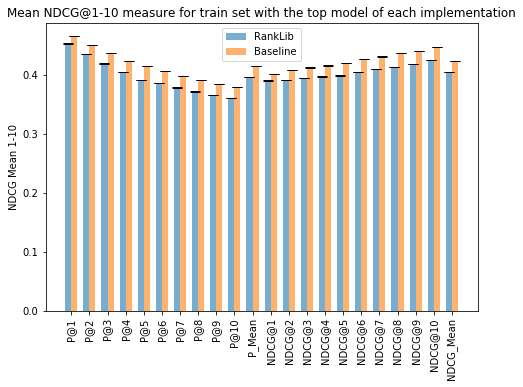

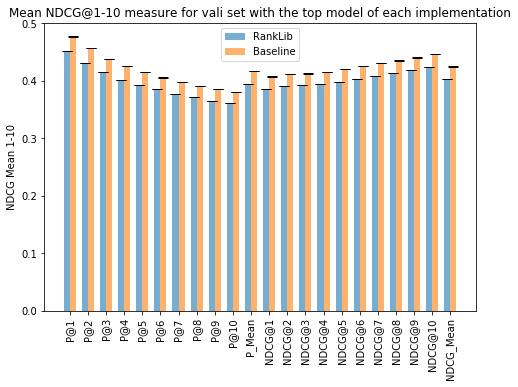

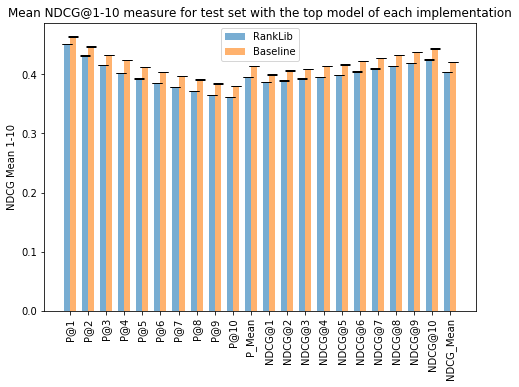

In [29]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, ranklib_mean[idx_dataset],width, yerr = ranklib_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "RankLib")
    ax.bar(indices+width/2, baseline_mean[idx_dataset],width, yerr = baseline_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "Baseline")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [30]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [31]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2007/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        ranklib_path = "../../MQ2007/results_summary/Results_RankLib_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        ranklib_df = pd.read_csv(ranklib_path)
        
        for idx_metric in range(len(measures_names)):
            ranklib_NDCG = ranklib_df.iloc[ranklib_top_model_id][measures_names[idx_metric]]
            baseline_NDCG = baseline_df.iloc[idx_fold][measures_names[idx_metric]]
            diff[idx_metric].append(ranklib_NDCG - baseline_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

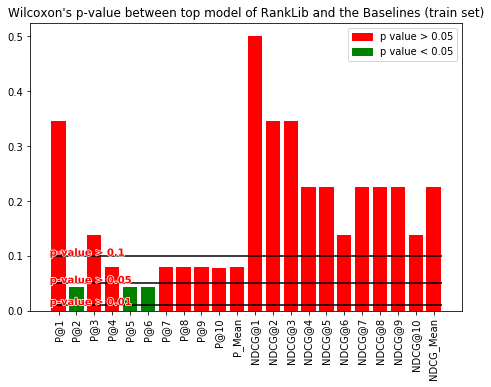

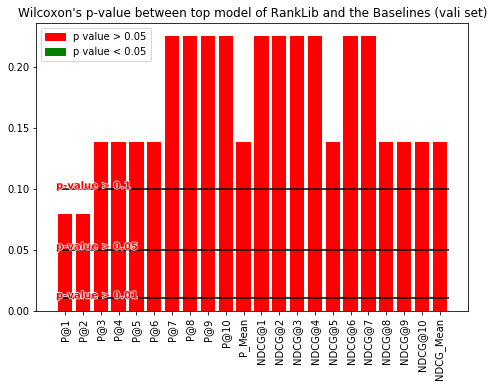

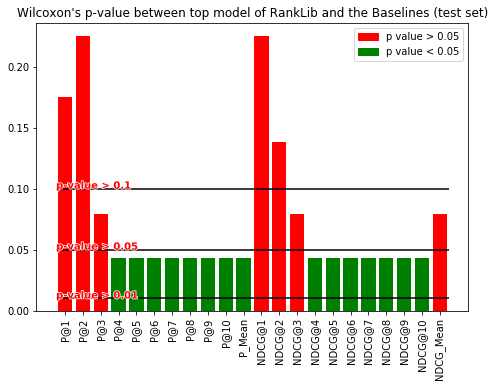

In [32]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of RankLib and the Baselines ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [33]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,4,0,2,1,0,0,1,1,1,1,1,5,4,4,3,3,2,3,3,3,2,3
vali,1,1,2,2,2,2,3,3,3,3,2,3,3,3,3,2,3,3,2,2,2,2
test,2.5,3,1,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,0,1


In [34]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0.345231,0.0431144,0.138011,0.0796158,0.0431144,0.0431144,0.0796158,0.0796158,0.0796158,0.0782482,0.0796158,0.500184,0.345231,0.345231,0.224916,0.224916,0.138011,0.224916,0.224916,0.224916,0.138011,0.224916
vali,0.0796158,0.0796158,0.138011,0.138011,0.138011,0.138011,0.224916,0.224916,0.224916,0.224916,0.138011,0.224916,0.224916,0.224916,0.224916,0.138011,0.224916,0.224916,0.138011,0.138011,0.138011,0.138011
test,0.175554,0.224916,0.0796158,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.224916,0.138011,0.0796158,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0796158
